In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys
sys.path.append("C:/Users/admin/Desktop/JuliaDQMC/code/")
from DP_Lib import *
from Plt_Lib import *


In [2]:
# 配置参数
folder_paths = "./"

# tlist = [0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.7,3.3]
# xidx1=1
# xticks=tlist
# xticks = np.round([x for x in np.arange(0.3,5.4,0.6)],1)  # 生成对数刻度位置

In [3]:
def powerfit(x,y):
    initial_guess = [ 1.0, 1.0]

    def model_func(x, b, c):
        return  b * x**(c)
    
    params, _ = curve_fit(
        model_func, x, y,
        p0=initial_guess,
        # bounds=None,
        maxfev=100000
    )
    return params

In [4]:
L=[]
mu=[]
sigma=[]
EE=[]
dEE=[]

throw=2

for count, file in enumerate(os.listdir(folder_paths)):
    if not file.endswith(".csv") or "EEicr" not in file:
        continue
    print(file)

    full_path = os.path.join(folder_paths, file)
    params = extract_numbers(file)
    L.append(params[3])

    data = []
    with open(full_path, "r", encoding="utf-8") as f:
        reader = csv.reader(f)
        for row in reader:
            data.append(row)

    data=combine_data(data,throw)
    print(data.shape)
    EE.append( -np.log(np.mean(data[:,1:])) )
    dEE.append( np.std(data[:,1:]) / ( np.sqrt(data.shape[1]-1) / np.mean(data[:,1:]) ) )
    mu.append(np.mean(np.log( data[:,1:]), axis=1))
    sigma.append( np.std(np.log(data[:,1:]),axis=1) )

# EE=-np.log(mu).reshape(-1)
# dEE=(np.array(sigma)/np.array(mu)).reshape(-1)
idx=np.argsort(L)
L=np.array(L).reshape(-1)[idx]  
mu=np.array(mu).reshape(-1)[idx]
sigma=np.array(sigma).reshape(-1)[idx]
EE=np.array(EE).reshape(-1)[idx]
dEE=np.array(dEE).reshape(-1)[idx]



SCEEicrHC120_t1.0U3.8size[12, 12]Δt0.1Θ3.0N1BS10.csv
(1, 419)
SCEEicrHC120_t1.0U3.8size[15, 15]Δt0.1Θ3.0N1BS10.csv
(1, 401)
SCEEicrHC120_t1.0U3.8size[18, 18]Δt0.1Θ3.0N1BS10.csv
(1, 121)
SCEEicrHC120_t1.0U3.8size[3, 3]Δt0.1Θ3.0N1BS10.csv
(1, 941)
SCEEicrHC120_t1.0U3.8size[6, 6]Δt0.1Θ3.0N1BS10.csv
(1, 979)
SCEEicrHC120_t1.0U3.8size[9, 9]Δt0.1Θ3.0N1BS10.csv
(1, 1567)


C:\Users\admin\AppData\Local\Temp\ipykernel_2848\1959475770.py:70: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.08)


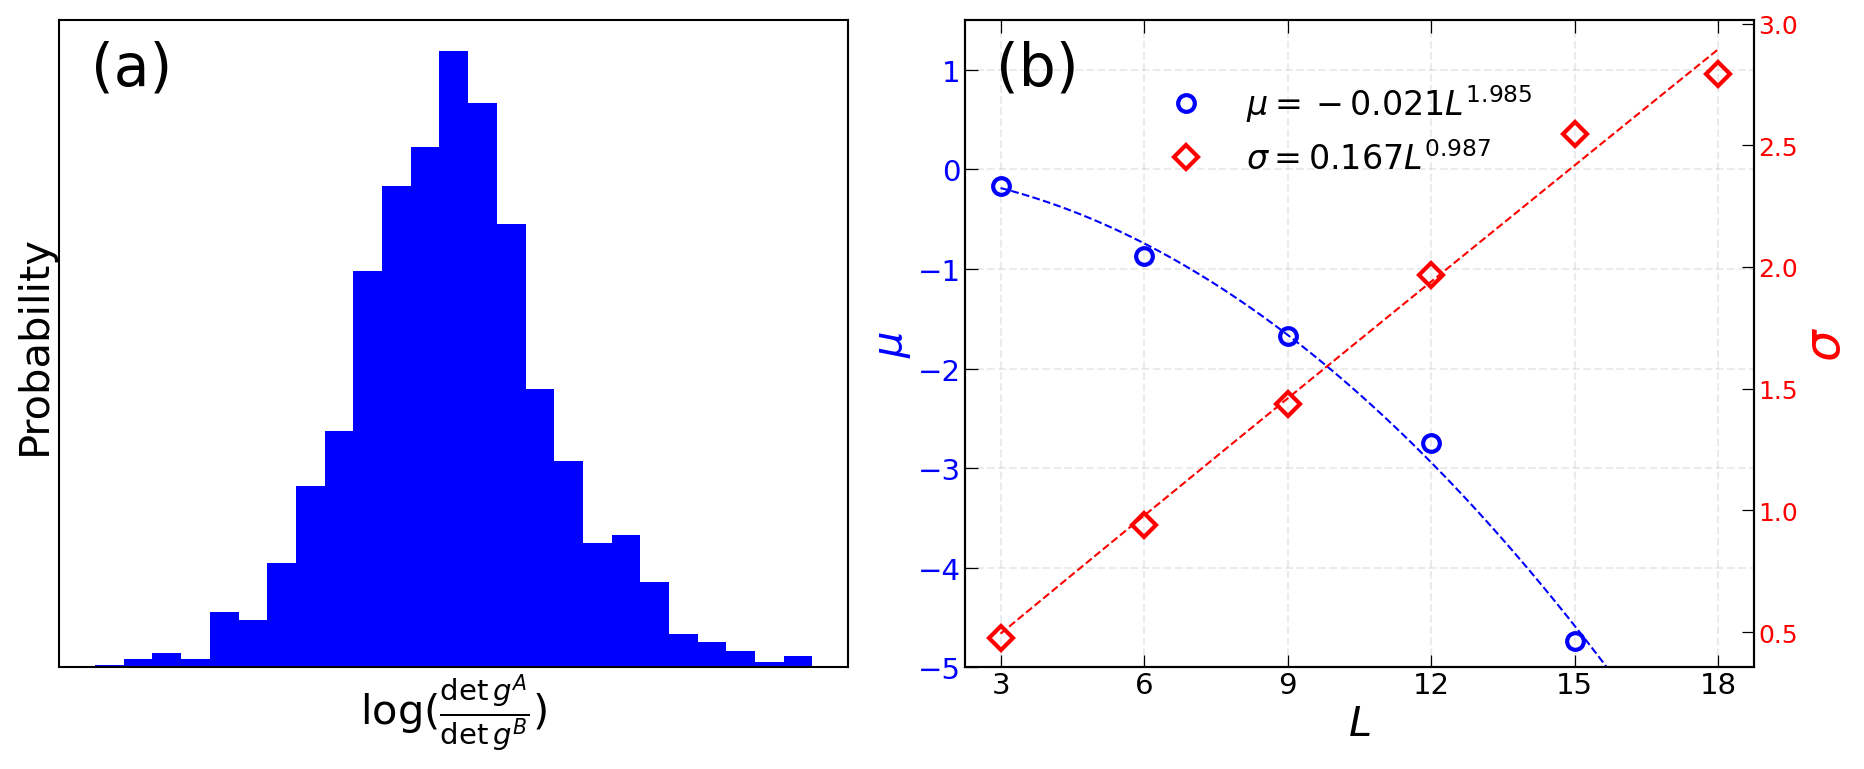

In [5]:
fig,ax=create_plot(1,2,col=2)

full_path = os.path.join(folder_paths, "SCEEicrHC120_t1.0U3.8size[9, 9]Δt0.1Θ3.0N1BS10.csv")
params = extract_numbers(file)

data = []
with open(full_path, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)

data=combine_data(data)

ax[0].hist(np.log(data[0,1:]),bins= 25,color="blue")
ax[0].set_xlabel(r"$\log(\frac{\det g^A}{\det g^B})$")
ax[0].set_ylabel("Probability")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

ax1=ax[1]
ax2 = ax1.twinx()                        # 副坐标轴（右侧）

ax1.set_ylim(-5,1.5)
ax1.set_ylabel(r'$\mu$', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2.set_ylabel(r'$\sigma$', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_xlabel(r"$L$")
ax1.set_xticks(L)
ax1.set_xticklabels([str(int(l)) for l in L])

x=np.linspace(min(L),max(L),100)

params=powerfit(L,sigma)
y= params[0] * x**(params[1])
ax2.plot(L,sigma,"D",color='red',markerfacecolor='none',label=rf"$\sigma={params[0]:.3f} L^{{{{{params[1]:.3f}}}}}$")
ax2.plot(x,y,"--",color="red",label="")

params=powerfit(L,np.abs(mu))
y= -params[0] * x**(params[1])
ax1.plot(L,mu,"o",color='blue',markerfacecolor='none',label=rf"$\mu=-{params[0]:.3f} L^{{{{{params[1]:.3f}}}}}$")
ax1.plot(x,y,"--",color="blue",label="")

# 合并左右轴图例为一个
h1,l1 = ax1.get_legend_handles_labels()
h2,l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left',bbox_to_anchor=(0.2,0.95),fontsize=8)


ABCD=["a","b","c","d","e","f","g"]
for idx, subax in enumerate(ax.ravel()):
    subax.grid(True, which='both',linestyle='--', linewidth=0.5, alpha=0.25)
    subax.minorticks_off()
    subax.text(0.04, 0.97, f'({ABCD[idx]})', transform=subax.transAxes, fontsize=14, va='top')

ax[0].tick_params(axis='x', labelsize=7)
ax[0].tick_params(axis='y', labelsize=7)
ax1.tick_params(axis='x', labelsize=7)
ax1.tick_params(axis='y', labelsize=7)
ax[0].set_xlabel(ax[0].get_xlabel(), fontsize=10)
ax1.set_xlabel(ax[1].get_xlabel(), fontsize=10)
ax[0].set_ylabel(ax[0].get_ylabel(), fontsize=10)
ax1.set_ylabel(ax[1].get_ylabel(), fontsize=10)


fig.subplots_adjust(bottom=0.08)
fig.savefig("Nicr.pdf", bbox_inches='tight', pad_inches=0.02)


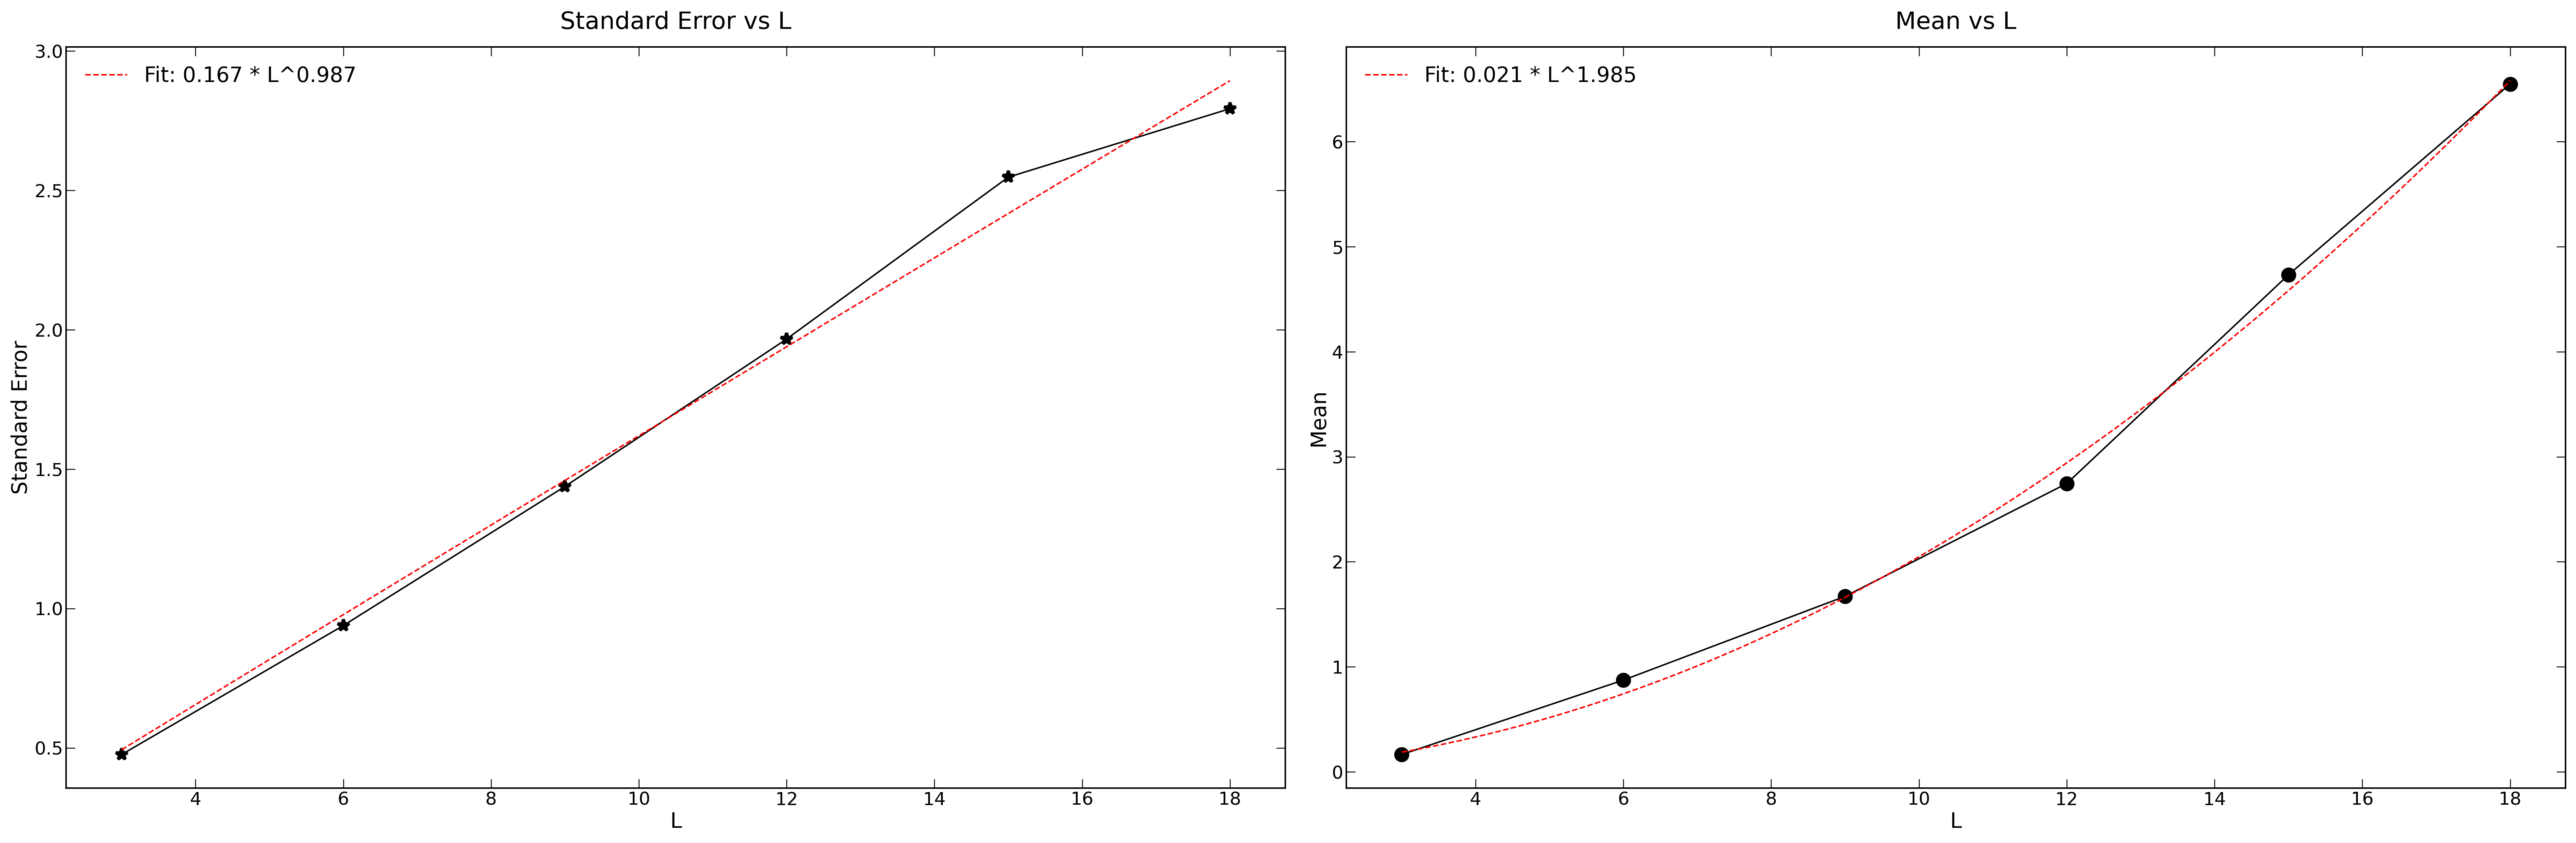

In [6]:
x=np.linspace(min(L),max(L),100)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(L,sigma,"*-")
params=powerfit(L,sigma)
y= params[0] * x**(params[1])
plt.plot(x,y,"r--",label=f"Fit: {params[0]:.3f} * L^{params[1]:.3f}")
plt.legend()
plt.xlabel("L")
plt.ylabel("Standard Error")
plt.title("Standard Error vs L")

plt.subplot(1,2,2)
plt.plot(L,-mu,"o-")
params=powerfit(L,np.abs(mu))
y= params[0] * x**(params[1])
plt.plot(x,y,"r--",label=f"Fit: {params[0]:.3f} * L^{params[1]:.3f}")
plt.legend()
plt.xlabel("L")
plt.ylabel("Mean")
plt.title("Mean vs L")
plt.tight_layout()
plt.show()

In [7]:
print("L=",L)
print((0.2*L**1.7))
print(np.ceil((0.2*L**1.7)))

L= [ 3.  6.  9. 12. 15. 18.]
[ 1.29460157  4.2061729   8.3799661  13.66589608 19.97032515 27.22659018]
[ 2.  5.  9. 14. 20. 28.]
